In [2]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('axes',unicode_minus = False)



import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 2-sample T-test

In [9]:
df1 = pd.DataFrame({"sample" : [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({"sample" : [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})

from scipy.stats import shapiro
from scipy.stats import levene
#d1정규성 만족/d2정규성 불만족 -> 원래 2-sample t-test 쓰면 안된다!
print(shapiro(df1))
print(shapiro(df2))

#등분산성 만족
print(stats.levene(df1['sample'], df2['sample']))

t_result = stats.ttest_ind(df1, df2, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.9094840288162231, 0.06230909377336502)
(0.8978105783462524, 0.03752673789858818)
LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)
2-Sample t-test
t:[-3.122]
p:[0.003]


In [11]:
A = pd.DataFrame({"sample" : [1.883, 1.715,1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
B = pd.DataFrame({"sample" : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

#A는 정규성 만족 B는 불만족
print(shapiro(A))
print(shapiro(B))

#등분산성 만족
print(stats.levene(A['sample'], B['sample']))

t_result = stats.ttest_ind(A, B, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.8425756096839905, 0.08004552870988846)
(0.7734811902046204, 0.014793740585446358)
LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)
2-Sample t-test
t:[1.7]
p:[0.111]


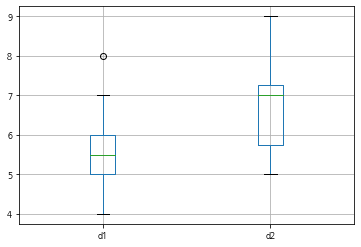

In [52]:
df1 = pd.DataFrame({"d1" : [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7],
                   "d2" : [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
df1.boxplot()

In [30]:
df1 = pd.DataFrame({"before": [720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({"after": [810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1,df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")

# -5.324 값이므로 학원간 후에 점수가 좋아졌다.
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-5.324]
p:[0.]


In [31]:
df1 = pd.DataFrame({"before": [720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({"after": [710,580,787,712,750,600,782,670,790,680]})

t_result = stats.ttest_rel(df1,df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")

# -2.266값으로 학원간 후에 점수가 좋아졌다.
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


# 1 Proportion test

In [33]:
count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion test")
print("z:{}".format(stat))
print("p:{}".format(pval))

1 Proportion test
z:1.4002800840280094
p:0.16142946236708322


In [34]:
count = 1500
n_obs = 10000
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion test")
print("z:{}".format(stat))
print("p:{}".format(pval))

1 Proportion test
z:14.002800840280093
p:1.4984678147052802e-44


In [35]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion test")
print("z:{}".format(stat))
print("p:{}".format(pval))

1 Proportion test
z:-2.0412414523193148
p:0.0412268333371637


# 2 Proportion test

In [38]:
count = np.array([4,1])
n_obs = np.array([1000, 1200])

stat, pval = proportions_ztest(count, n_obs)

print("2 Proportion test")
print("z:{}".format(stat))
print("p:{}".format(pval))

2 Proportion test
z:1.553109404737079
p:0.12039699966295712


In [39]:
count = np.array([400,100])
n_obs = np.array([100000, 120000])

stat, pval = proportions_ztest(count, n_obs)

print("2 Proportion test")
print("z:{}".format(stat))
print("p:{}".format(pval))

2 Proportion test
z:15.531094047370791
p:2.1370254056121516e-54


In [40]:
count = np.array([14,5])
n_obs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, n_obs)

print("2 Proportion test")
print("z:{}".format(stat))
print("p:{}".format(pval))

2 Proportion test
z:2.0729633895345208
p:0.03817568685216671


# 카이제곱 검정

In [45]:
df = pd.DataFrame({'HSG':[270,260,236,234],'SS':[228,285,225,262], 'SPA':[277,284,231,208]})
chi,pval,dof,expected = stats.chi2_contingency(df.T)

print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))
      

chi-square test
chisq: 13.366
p:0.038
degree of freedom: 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


In [51]:
stats.chi2.cdf(chi, dof)

0.9624255061208257

In [43]:
df = pd.DataFrame({'A':[18,1,8,7,10,9,10], 'B':[8,2,14,5,5,9,4], 'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],
                   'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
chi,pval,dof,expected = stats.chi2_contingency(df.T)

print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq: 98.274
p:0.000
degree of freedom: 30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


# One way ANOVA

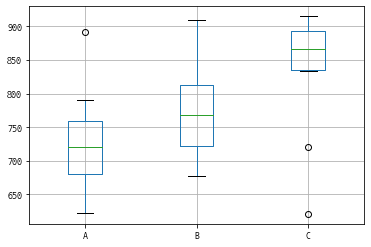

In [53]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                  'B':[721,821,910,678,723,790,711,790,745,891],
                  'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])

In [54]:
f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 4.263
p-value : 0.025


# 상관분석

In [58]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1,df2)

print("Correlation Analysis")
print("coff: {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

Correlation Analysis
coff: 0.989
p-value : 0.000


In [60]:
strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
temp = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr, pval = stats.pearsonr(strength,temp)

print("Correlation Analysis")
print("coff: {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

Correlation Analysis
coff: -0.723
p-value : 0.000


# 단순 회귀분석

In [74]:
Minutes = [1,2,3,4,4,5,6,6,7,8]
Units = [23,29,49,64,74,87,96,97,109,119]

unit = sm.add_constant(Units)
model = sm.OLS(Minutes, unit)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.82e-08
Time:                        16:50:24   Log-Likelihood:                -2.4282
No. Observations:                  10   AIC:                             8.856
Df Residuals:                       8   BIC:                             9.462
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3794      0.282     -1.343      0.2

(array([1., 1., 0., 2., 1., 3., 0., 0., 1., 1.]),
 array([-7.53153153, -5.96756757, -4.4036036 , -2.83963964, -1.27567568,
         0.28828829,  1.85225225,  3.41621622,  4.98018018,  6.54414414,
         8.10810811]),
 <a list of 10 Patch objects>)

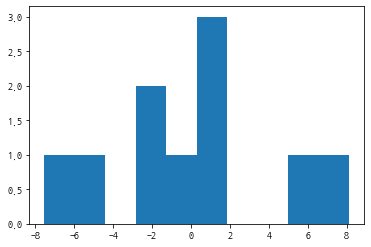

In [65]:
plt.hist(result.resid) #정규성검정

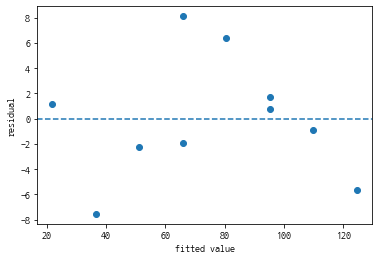

In [69]:
plt.scatter(result.fittedvalues, result.resid)#등분산성검정
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

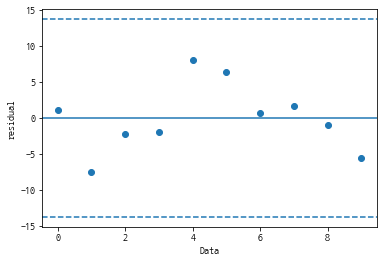

In [73]:
plt.scatter(range(0,10), result.resid, marker="o") #독립성 검정
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y = 3*np.std(result.resid), linestyle="--")
plt.axhline(y = -3*np.std(result.resid), linestyle="--")

In [68]:
#더빈왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid)

1.2832842622941938